# [Quantum Science and Metrology with Mixed-Species Ion Chains](https://doi.org/10.1016/B978-0-12-408090-4.00004-9)
Jonathan P. Home, Advances in Atomic, Molecular, and Optical Physics, Volume 62, 2013, Pages 231-277

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ion_sim import IonSim, init
from pint import UnitRegistry
from math import pi as π

u = UnitRegistry()
u.setup_matplotlib()

## Table 1
Normal mode eigenfrequencies and eigenvectors for a beryllium-magnesium ion chain in a trap for which a single beryllium ion has secular frequencies of [ωx, ωy, ωz] = 2π × ([12.26, 11.19, 2.69] MHz), and magnesium has secular frequencies [ωx, ωy, ωz] = 2π × ([3.72, 4.82, 1.65] MHz) [sic]. The room-mean-square position uncertainty of the motional component ζi in the normal mode denoted by α is $\sqrt{\hbar/(2m\omega_\alpha)} e_{i,\alpha}$ when the mode is in the ground state. The index i takes values x1, y1, z1 for the beryllium ion, and x2, y2, z2 for the magnesium ion. Values of zero are quoted at the same level as precision as the non-zero values, with zeros after the decimal place removed for ease of viewing.
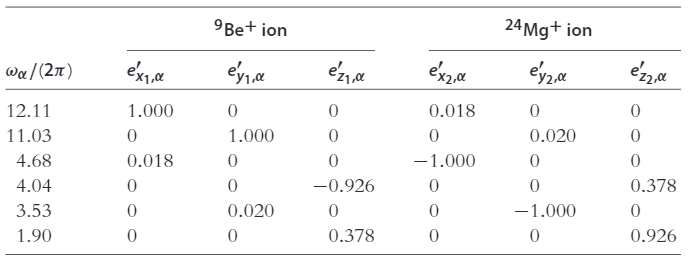
*Note: there is likely a typo here where the values of ωx and ωy for Magnesium are transposed.*

In [2]:
# ωx = np.array([12.26, 3.72]) * 2*π * u('MHz')
# ωy = np.array([11.19, 4.82]) * 2*π * u('MHz')
ωx = np.array([12.26, 4.82]) * 2*π * u('MHz')
ωy = np.array([11.19, 3.72]) * 2*π * u('MHz')
ωz = np.array([2.69, 1.65]) * 2*π * u('MHz')

class MixedExample(IonSim):
    def U(self, x, y, z, t):
        m = self.m
        Ux = (1/2) * m * (ωx)**2 * x**2
        Uy = (1/2) * m * (ωy)**2 * y**2
        Uz = (1/2) * m * (ωz)**2 * z**2
        return (Ux + Uy + Uz).to_base_units().m

mix = MixedExample(u)
mix.m = np.array([9.012, 23.985]) * u('1 amu')
mix.x0 = init.gaussian(mix, sigma=np.array([1, 1, 1]) * u('1 um'))
ν, e = mix.normal_modes()

# scale eigenvectors by mass
ep = np.around(np.moveaxis(np.moveaxis(e, (0,1,2), (1,2,0)) * np.sqrt(mix.m.m), (0,2,1), (0,1,2)).reshape(6,6),3)[::-1,:]
# normalize eigenvectors
ep = np.around(ep.T / np.sqrt(np.sum(ep**2,1)),3).T

freq = np.around(ν.to('MHz').m[::-1],2)

print(f'{" ":<8} {"9Be+ ion":^24}   {"25Mg+ ion":^24}')
print(f'{"ωα/(2π)":<8} [{"ex1,α":>7} {"ey1,α":>7} {"ez1,α":>7}] [{"ex2,α":>7} {"ey2,α":>7} {"ez2,α":>7}]')
for row in range(len(freq)):
    print(f'{freq[row]:<8} [{ep[row,0]:>7} {ep[row,1]:>7} {ep[row,2]:>7}] [{ep[row,3]:>7} {ep[row,4]:>7} {ep[row,5]:>7}]')

                 9Be+ ion                  25Mg+ ion        
ωα/(2π)  [  ex1,α   ey1,α   ez1,α] [  ex2,α   ey2,α   ez2,α]
12.11    [    1.0     0.0     0.0] [  0.018    -0.0    -0.0]
11.03    [   -0.0     1.0     0.0] [   -0.0    0.02    -0.0]
4.67     [  0.018    -0.0     0.0] [   -1.0    -0.0    -0.0]
4.04     [   -0.0    -0.0   0.926] [    0.0    -0.0  -0.379]
3.53     [   -0.0   -0.02     0.0] [    0.0     1.0    -0.0]
1.9      [    0.0     0.0   0.379] [   -0.0    -0.0   0.926]


## Table 2
Normal mode eigenfrequencies and eigenvectors for a beryllium-magnesiumion chain under the same conditions as those used for Table 1 but with an additional field of 200 V/m applied along the radial y direction.
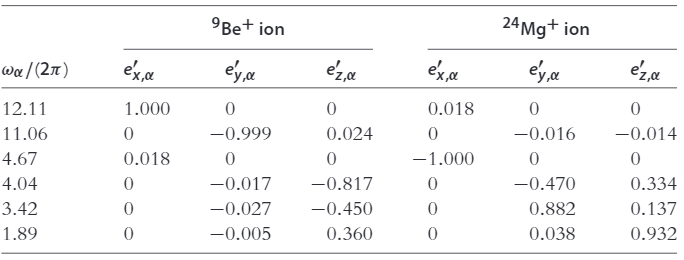

In [3]:
ωx = np.array([12.26, 4.82]) * 2*π * u('MHz')
ωy = np.array([11.19, 3.72]) * 2*π * u('MHz')
ωz = np.array([2.69, 1.65]) * 2*π * u('MHz')

class MixedExample_Field(IonSim):
    E = u('200 V/m')
    def U(self, x, y, z, t):
        m = self.m
        Ux = (1/2) * m * (ωx)**2 * x**2
        Uy = (1/2) * m * (ωy)**2 * y**2 + u('e/m')*self.E * y
        Uz = (1/2) * m * (ωz)**2 * z**2
        return (Ux + Uy + Uz).to_base_units().m

mix_field = MixedExample_Field(u)
mix_field.m = np.array([9.012, 23.985]) * u('1 amu')
mix_field.x0 = init.gaussian(mix_field, sigma=np.array([1, 1, 1]) * u('1 um'))
ν, e = mix_field.normal_modes()

# scale eigenvectors by mass
ep = np.around(np.moveaxis(np.moveaxis(e, (0,1,2), (1,2,0)) * np.sqrt(mix_field.m.m), (0,2,1), (0,1,2)).reshape(6,6),3)[::-1,:]
# normalize eigenvectors
ep = np.around(ep.T / np.sqrt(np.sum(ep**2,1)),3).T

freq = np.around(ν.to('MHz').m[::-1],2)

print(f'{" ":<8} {"9Be+ ion":^24}   {"25Mg+ ion":^24}')
print(f'{"ωα/(2π)":<8} [{"ex1,α":>7} {"ey1,α":>7} {"ez1,α":>7}] [{"ex2,α":>7} {"ey2,α":>7} {"ez2,α":>7}]')
for row in range(len(freq)):
    print(f'{freq[row]:<8} [{ep[row,0]:>7} {ep[row,1]:>7} {ep[row,2]:>7}] [{ep[row,3]:>7} {ep[row,4]:>7} {ep[row,5]:>7}]')

                 9Be+ ion                  25Mg+ ion        
ωα/(2π)  [  ex1,α   ey1,α   ez1,α] [  ex2,α   ey2,α   ez2,α]
12.11    [    1.0    -0.0    -0.0] [  0.018     0.0     0.0]
11.06    [    0.0   0.999   0.025] [    0.0   0.016  -0.014]
4.67     [ -0.018    -0.0     0.0] [    1.0    -0.0    -0.0]
4.04     [    0.0  -0.017   0.817] [   -0.0  -0.469  -0.335]
3.42     [    0.0  -0.027    0.45] [   -0.0   0.882  -0.137]
1.89     [   -0.0   0.005    0.36] [    0.0  -0.038   0.932]


## Figure 1
Calculated frequency shifts of the normal modes of a magnesium-beryllium ionpair as a function of the radial electric field strength. The electric field is applied parallelto theyaxis of a trap for which a single beryllium ion would have trap frequencies of fz=2.7MHz, fx=12.26 MHz, fy=11.18 MHz. The modes shown exhibit motion along z and y for zero field (modes exhibiting motion along the x direction have a negligible field shift for the sizes of fields used in this figure). The plots are (a) the in-phase radial mode directed along y, (b) the out-of-phase mode directed along y,(c)the axial out-of-phase mode, and (d) the axial in-phase mode of motion.
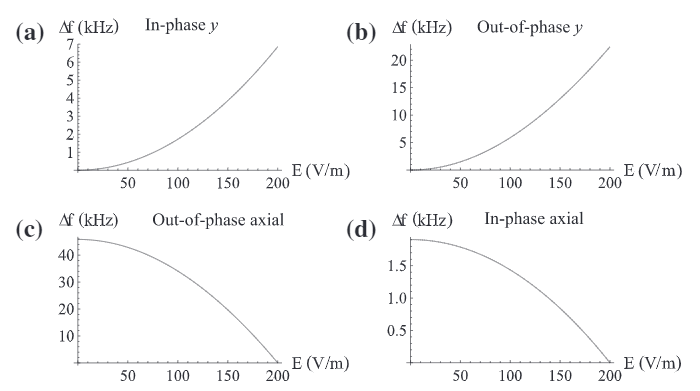
*Note: This figure is very likely incorrect, as it is inconsistent with the shift between Table 1 and Table 2, both in magnitude of shift and in sign.*

Text(0.5, 1.0, 'In-phase axial')

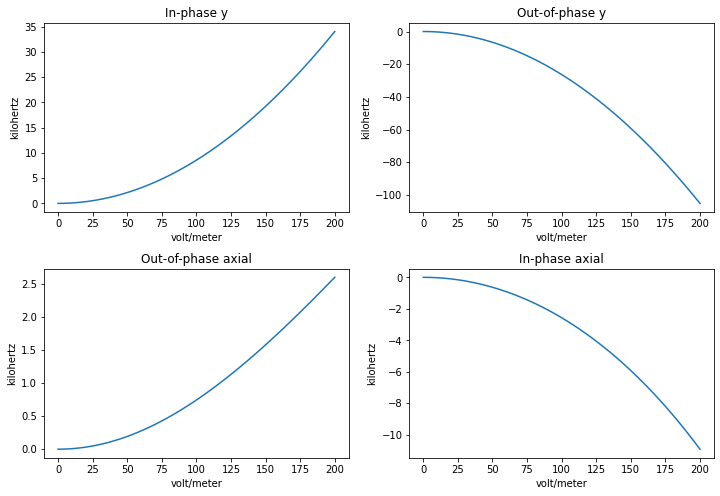

In [4]:
mix_field = MixedExample_Field(u)
mix_field.m = np.array([9.012, 23.985]) * u('1 amu')
mix_field.x0 = init.string(mix_field, dim=2, dx=u('10 um'))
E = np.linspace(0, 200) * u('V/m')

freq = np.zeros((len(E),6))
for i,E_i in enumerate(E):
    mix_field.E = E_i
    ν, _ = mix_field.normal_modes()
    freq[i,:] = ν.to('MHz').m
freq *= u.MHz

fig = plt.figure(figsize=(12,8))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.2)
(ax1, ax2), (ax3, ax4) = gs.subplots()

ax1.plot(E,(freq[:,4] - freq[0,4]).to('kHz'))
# ax1.plot(E, freq[:,4])
ax1.set_title('In-phase y')

ax2.plot(E,(freq[:,1] - freq[0,1]).to('kHz'))
# ax2.plot(E, freq[:,1])
ax2.set_title('Out-of-phase y')

ax3.plot(E,(freq[:,2] - freq[0,2]).to('kHz'))
# ax3.plot(E, freq[:,2])
ax3.set_title('Out-of-phase axial')

ax4.plot(E,(freq[:,0] - freq[0,0]).to('kHz'))
# ax4.plot(E, freq[:,0])
ax4.set_title('In-phase axial')